<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Condu%C3%A7%C3%A3o_1D_Transiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.8704000000000001


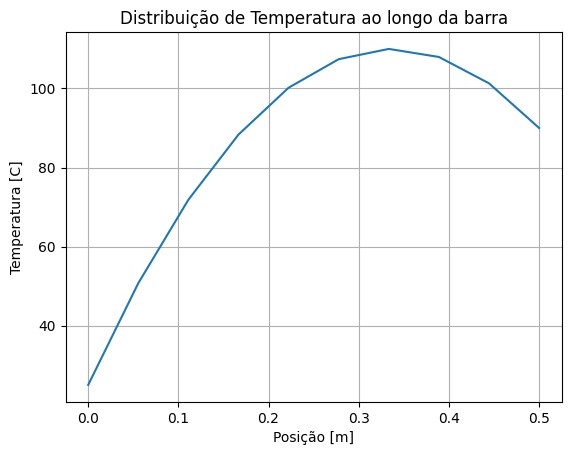

Tempo de execução: 1.145e+01 segundos.


In [ ]:

"""Condução unidimensinal transiente com fonte

   =================================================================================

   Formulação EXPLÍCITA no tempo (theta = 0)
   Discretização no tempo Euler Regressiva de 1a ordem
   (será limitado por estabilidade)
   Discretização no espaço CDS  (2a ordem)
   Neste caso, não há montagem de matriz, as equções são resolvidas
   uma a uma a aprtir dos valores precedentes

   =================================================================================

   Introdução à Fluidodinâmica Computacional

   Prof. Dr. Ricardo V. P. Rezende  ©2024

   =================================================================================
"""



import numpy as np
import matplotlib.pyplot as plt
import time

# Parâmetros do problema
L = 0.5  # comprimento da barra
T_final = 100# tempo final em segundos
rho = 1 #8800.0  # densidade do Cobre
c = 1# 428.0 # calor específico do Cobre
k = 2 #   # condutividade térmica
alpha = k/rho/c  # difusividade térmica

q = 3000  # geração de calor constante

# Parâmetros de discretização
Nx = 10  # número de pontos de grade no espaço

dx = L / float(Nx - 1)  # espaçamento no espaço
#=======================================
dt = 0.1e-3# espaçamento no tempo
#=====================================
Nt = int(T_final/dt) # número de passos de tempo

Ae = alpha*dt/dx**2
Aw = Ae
Ap = 1.0
Apo = Ap - Ae - Aw
print(Apo)
if Apo < 0:
  print("Erro: Coeficiente Negativo!!! Repense o passo de tempo e malha")
  exit()
# Vetor de temperatura
T = np.zeros(Nx)

# Condição inicial
T_old = np.zeros(Nx)
T0 = 25.0 # temperatura inicial
Te = 25.0  # temperatura de contorno
Tr = 90.0# temperatura de contorno
T_old[:] = T0

# Termo de geração de calor
Sp = np.zeros(Nx)
Sp[:] = dt*q/rho/c  # termo fonte

# Solução numérica usando método explícito
T_new = np.zeros(Nx)

# Marca o tempo de início
start_time = time.time()

# Loop para cada passo de tempo
for n in range(1, Nt):
  # Condições de contorno (Dirichlet)
    T_old[0] = Te
    T_old[-1] = Tr

    # Atualização da temperatura
    for i in range(1, Nx - 1):
        T_new[i] =  Ae*T_old[i-1] + Apo*T_old[i] + Aw*T_old[i+1] + Sp[i]

     #atualização
    T_old = T_new

# Marca o tempo de fim
end_time = time.time()

# Plot da solução
x = np.linspace(0, L, Nx)
plt.plot(x, T_new)
plt.xlabel('Posição [m]')
plt.ylabel('Temperatura [C]')
plt.title('Distribuição de Temperatura ao longo da barra')
plt.grid(True)
plt.show()

# Calcula o tempo de execução
execution_time = end_time - start_time

print(f"Tempo de execução: {execution_time:.3e} segundos.")